**1. Plot the average image**

<Figure size 432x288 with 0 Axes>

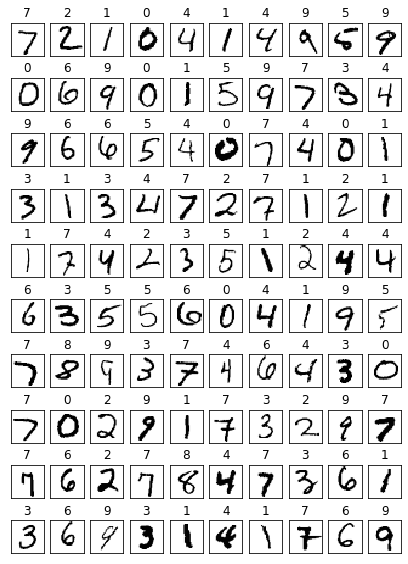

In [1]:
import matplotlib.pyplot as plt
import numpy as np

file_data   = "mnist_test.csv"
handle_file = open(file_data, "r")
data        = handle_file.readlines()
handle_file.close()

size_row    = 28    # height of the image
size_col    = 28    # width of the image

num_image   = len(data)
count       = 0     # count for the number of images

#
# make a matrix each column of which represents an images in a vector form 
#
list_image  = np.empty((size_row * size_col, num_image), dtype=float)
list_label  = np.empty(num_image, dtype=int)

for line in data:

    line_data   = line.split(',')
    label       = line_data[0]
    im_vector   = np.asfarray(line_data[1:])

    list_label[count]       = label
    list_image[:, count]    = im_vector    

    count += 1

# 
# plot first 100 images out of 10,000 with their labels
# 
f1 = plt.figure(1)
plt.figure(figsize=(7, 10))
for i in range(100):
    label       = list_label[i]
    im_vector   = list_image[:, i]
    im_matrix   = im_vector.reshape((size_row, size_col))
    plt.subplot(10, 10, i+1)
    plt.title(label)
    plt.imshow(im_matrix, cmap='Greys', interpolation='None')
    frame   = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)

plt.show()


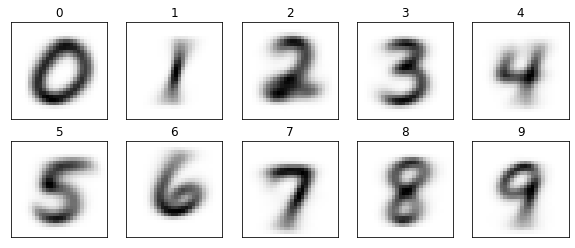

In [3]:
v = np.zeros((10, size_row * size_col))
c = np.zeros(10)
for i in range(count):
  label = list_label[i]
  im_vector = list_image[:, i]
  v[label] += im_vector
  c[label] += 1

f1 = plt.figure(figsize=(10, 4))
for i in range(10):
  im_vector   = v[i] / c[i] 
  im_matrix   = im_vector.reshape((size_row, size_col))
  plt.subplot(2, 5, i + 1)
  plt.title(i)
  plt.imshow(im_matrix, cmap='Greys', interpolation='None')
  frame = plt.gca()
  frame.axes.get_xaxis().set_visible(False)
  frame.axes.get_yaxis().set_visible(False) 
plt.show()

**2. Present the output of the neural network with random weights**

In [0]:
def sigmoid(x):
  return 1 / (1 + np.e ** -x)

activation_function = lambda x: sigmoid(x)
 
def train(inputs_list, targets_list, w):
  inputs = np.array(inputs_list, ndmin=2).T
  targets = np.array(targets_list, ndmin=2).T
  outputs = np.dot(w, inputs)
  final_outputs =  activation_function(outputs)
  output_errors = targets - final_outputs
  # Update the weights:
  temp = output_errors * final_outputs * (1.0 - final_outputs)     
  temp =  lr  * np.dot(temp, inputs.T)
  w += temp 
  
def query(inputs_list):
  inputs = np.array(inputs_list, ndmin=2).T
  outputs = np.dot( w, inputs)
  final_outputs =  activation_function(outputs)
  return final_outputs

# Training
input_nodes = 784
output_nodes = 10
lr = 1

# random normal distribution with mean = 0, standard deviation = 1
w = np.random.normal(0.0, 1.0, ( output_nodes,  input_nodes))

interactions = 10
for interaction in range(interactions):
  for line in data:
    line_data = line.split(',')
    im_vector = (np.asfarray(line_data[1:]) / 255.0 * 0.99) + 0.01
    labels = np.zeros(output_nodes) + 0.01
    labels[int(line_data[0])] = 0.99
    train(im_vector, labels, w)

**Plot the output**

In [21]:
outputs = np.zeros((10, 10))
for line in data:
  line_data = line.split(',')
  im_label = int(line_data[0])
  im_vector = (np.asfarray(line_data[1:]) / 255.0 * 0.99) + 0.01
  output = model.query(im_vector)
  output = np.reshape(output, 10)
  outputs[im_label] += output
  
for i in range(10):
  out = outputs[i] / c[i]
  print("Label: ", i , out)  

Label:  0 [9.17613359e-08 1.58944872e-12 1.15536922e-02 6.35614629e-04
 1.21879932e-03 2.38208166e-04 7.70931522e-10 1.02069115e-03
 8.87384978e-03 3.77466053e-05]
Label:  1 [5.57453067e-05 9.63713976e-01 3.24625219e-03 1.22366482e-03
 8.64934932e-04 8.87271344e-04 1.51798401e-07 1.21706211e-04
 6.42495622e-03 6.33277228e-05]
Label:  2 [4.09037699e-06 4.68322918e-04 9.09906124e-01 6.59351969e-03
 1.21639721e-02 9.63356498e-04 3.37417528e-07 9.62736912e-03
 2.38357895e-02 1.94779058e-07]
Label:  3 [2.88880606e-06 7.17863749e-04 1.59176758e-02 8.46529006e-01
 4.37930553e-04 5.26095127e-03 1.08354932e-07 5.93502451e-03
 5.36776957e-03 3.40221534e-05]
Label:  4 [6.01562721e-07 1.02255227e-03 2.69046613e-03 4.22143419e-03
 9.01120827e-01 3.61496964e-04 8.34204825e-07 1.18561916e-06
 5.33762062e-03 1.98773972e-05]
Label:  5 [8.06104746e-05 1.83242992e-03 7.81379236e-03 2.69735949e-02
 1.13719415e-02 7.16337720e-01 6.86877255e-06 3.35527114e-03
 4.83357056e-02 2.23187066e-05]
Label:  6 [2.859